In [26]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-03-18 18:15:26,962 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:b1:6a:38:3C
2023-03-18 18:15:36,972 | ERROR    |: Device with address C0:83:b1:6a:38:3C was not found.
2023-03-18 18:15:37,985 | WARNING  |: Attempting to connect again...
2023-03-18 18:15:37,987 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:b1:6a:38:3C
2023-03-18 18:15:50,214 | INFO     |: Connected to C0:83:b1:6a:38:3C


In [28]:
def get_data_cb(uuid, byte_array):
    global tof_list, pwm_list
    if byte_array is not None:
        s = byte_array.decode("utf-8")
        s = s.split("|")  # split each reading
        
        if s[0] == 'T':
            # TOF
            readings = s[1].split(',')[:-1]
            for reading in readings:
                tof_list.append(int(reading))
        else:
            # PWM
            readings = s[1].split(',')[:-1]
            for reading in readings:
                pwm_list.append(int(reading))

In [29]:
ble.start_notify(ble.uuid['RX_STRING'], get_data_cb)

In [30]:
tof_list = []
pwm_list = []

In [31]:
# start
ble.send_command(CMD.SEND_TWO_INTS, "")

In [32]:
# stop
ble.send_command(CMD.SEND_THREE_FLOATS, "")

In [33]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [34]:
print(tof_list)
print(pwm_list)

[1133, 1104, 1112, 1112, 1103, 1093, 1083, 1058, 1027, 992, 963, 936, 897, 865, 828, 788, 750, 710, 673, 642, 610, 573, 538, 505, 481, 452, 423, 399, 377, 355, 335, 313, 292, 270, 262, 261, 263, 264, 262, 262, 263, 263, 263, 263, 263, 261, 261, 262, 262, 261, 262, 263, 262, 262, 261, 261, 260, 262, 262, 261, 262, 259, 262, 0]
[40, 74, 60, 79, 75, 71, 71, 69, 62, 58, 54, 56, 55, 47, 49, 45, 42, 40, 37, 38, 37, 35, 31, 28, 29, 32, 27, 27, 28, 27, 27, 26, 42, 43, 43, 28, 31, 33, 32, 31, 32, 32, 32, 32, 32, 31, 30, 31, 32, 31, 31, 32, 32, 31, 31, 31, 31, 31, 32, 31, 31, 31, 30, 0]


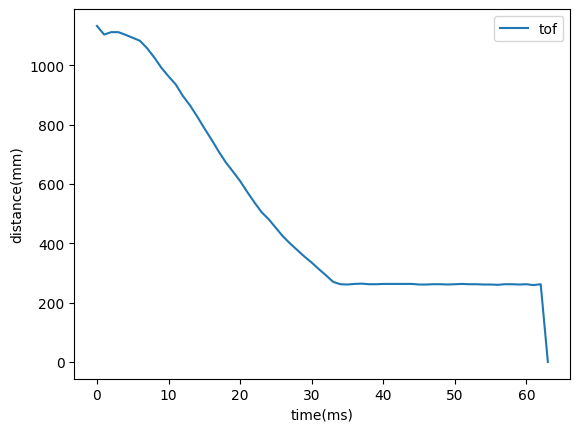

In [36]:
x_list = range(len(tof_list))
plt.plot(x_list, tof_list[:80], label='tof')
# plt.ylim(min([min(tof1_list), min(tof2_list)]) - 10, max([max(tof1_list), max(tof2_list)]) + 20)
plt.legend(loc="upper right")
plt.xlabel('time(ms)')
plt.ylabel('distance(mm)')
plt.show()

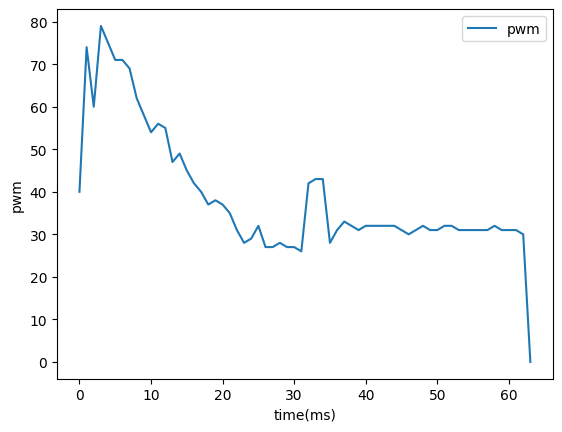

2023-03-18 18:17:20,397 | INFO     |: Disconnected from C0:83:b1:6a:38:3C


In [37]:
plt.plot(x_list, pwm_list, label='pwm')
plt.legend(loc="upper right")
plt.xlabel('time(ms)')
plt.ylabel('pwm')
plt.show()

In [ ]:
# Disconnect
ble.disconnect()